In [76]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sqlalchemy import create_engine
import warnings

pd.set_option('display.float_format', lambda x: '%.5f' % x)

warnings.filterwarnings('ignore')

postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'useducation'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

used_df_raw = pd.read_sql_query('select * from useducation',con=engine)

# no need for an open connection, 
# as we're only doing a single query
engine.dispose()

used_df = used_df_raw.fillna(used_df_raw.median())

# Question 1

In [77]:
used_df.describe()

,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
count,1492.00000,1492.00000,1492.00000,1492.00000,1492.00000,1492.00000,1492.00000,1492.00000,1492.00000,1492.00000,...,1492.00000,1492.00000,1492.00000,1492.00000,1492.00000,1492.00000,1492.00000,1492.00000,1492.00000,1492.00000
mean,2004.43365,868756.90214,8521936.01273,714793.83914,3977913.77681,3817389.99598,8633690.80295,4463791.40952,2516226.02614,401422.40080,...,62671.65684,62433.18901,52729.41756,503985.80965,239800.38204,773210.13472,236.35111,279.83289,219.86236,264.56038
std,7.39398,972139.56243,10968084.06796,1068252.23686,5167295.99829,5128620.04848,11179903.36676,5874675.88817,3131896.36047,488392.37806,...,76920.98354,75596.91869,65028.06229,616671.14784,294810.95746,916216.72536,6.23657,6.15433,4.70014,3.97940
min,1992.00000,43866.00000,465650.00000,31020.00000,0.00000,22093.00000,481665.00000,265549.00000,139963.00000,11541.00000,...,633.00000,437.00000,311.00000,4878.00000,1808.00000,7254.00000,187.13467,232.83151,178.55761,236.37910
25%,1998.00000,315094.00000,2546260.75000,217020.00000,1356434.00000,944796.25000,2523968.50000,1343611.25000,767368.75000,135428.25000,...,15195.50000,15682.75000,13437.00000,121152.25000,59197.50000,229357.75000,237.23855,280.61880,220.41603,265.01091
50%,2004.00000,648313.00000,5079546.00000,403376.50000,2537073.50000,2055780.50000,5234505.50000,2657452.00000,1525405.50000,271596.00000,...,43272.00000,43339.00000,36735.00000,345775.00000,164260.00000,550342.00000,237.23855,280.61880,220.41603,265.01091
75%,2011.00000,921178.00000,9276958.00000,750503.25000,4269811.00000,3959033.25000,9434922.00000,4938819.75000,2795887.50000,456891.50000,...,71814.25000,72131.00000,64616.25000,574911.75000,282539.00000,872422.00000,237.23855,280.61880,220.41603,265.01091
max,2017.00000,6307022.00000,89217262.00000,9990221.00000,50904567.00000,36105265.00000,85320133.00000,43964520.00000,26058021.00000,3995951.00000,...,493415.00000,500143.00000,498403.00000,3929869.00000,2013687.00000,5944746.00000,253.42096,300.56824,236.77387,280.49913


One interesting note; the standard deviations for a lot of the financial categories are larger than their averages.

# Question 2

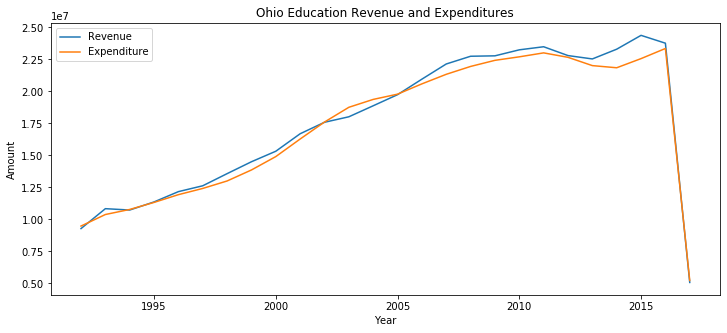

In [78]:
ohio = used_df[used_df.STATE=='OHIO']
plt.figure(figsize=(12,5))
plt.plot(ohio['YEAR'], ohio['TOTAL_REVENUE'], label='Revenue')
plt.plot(ohio['YEAR'], ohio['TOTAL_EXPENDITURE'], label='Expenditure')
plt.title('Ohio Education Revenue and Expenditures')
plt.xlabel('Year')
plt.ylabel('Amount')
plt.legend()
plt.show()

The last observation (year 2017) was imputed with the median from the dataset. This is obviously not a great choice for this variable and significantly affects this chart.

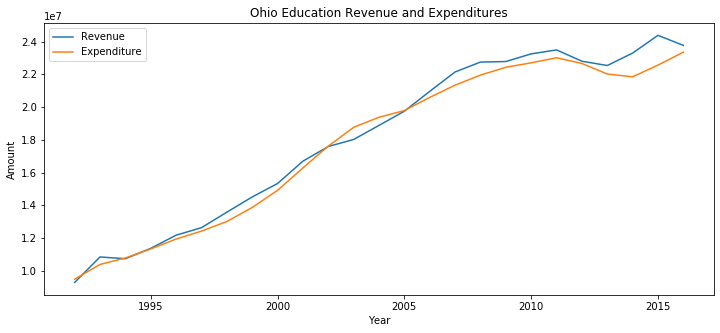

In [79]:
ohio_q2 = ohio[ohio.YEAR != 2017]
plt.figure(figsize=(12,5))
plt.plot(ohio_q2['YEAR'], ohio_q2['TOTAL_REVENUE'], label='Revenue')
plt.plot(ohio_q2['YEAR'], ohio_q2['TOTAL_EXPENDITURE'], label='Expenditure')
plt.title('Ohio Education Revenue and Expenditures')
plt.xlabel('Year')
plt.ylabel('Amount')
plt.legend()
plt.show()

# Question 3

In [80]:
ohio.describe()

,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
count,26.00000,26.00000,26.00000,26.00000,26.00000,26.00000,26.00000,26.00000,26.00000,26.00000,...,26.00000,26.00000,26.00000,26.00000,26.00000,26.00000,26.00000,26.00000,26.00000,26.00000
mean,2004.50000,1666497.11538,17638294.42308,1221602.86538,7356857.40385,9056629.71154,17293102.36538,8622168.73077,5671646.90385,740324.76923,...,128025.88462,132061.30769,114601.42308,1040346.07692,514017.65385,1581135.19231,237.97410,281.80379,221.61593,264.72490
std,7.64853,311972.48497,5547629.74052,582086.99311,2371919.51243,2702637.37558,5320603.88392,2489128.29075,1734369.29476,206324.99511,...,25391.95677,26471.99783,23786.17353,207217.40696,105414.46605,306245.86641,5.14489,3.93700,1.84712,3.82636
min,1992.00000,648313.00000,5079546.00000,403376.50000,2537073.50000,2055780.50000,5234505.50000,2657452.00000,1525405.50000,271596.00000,...,43272.00000,43339.00000,36735.00000,345775.00000,164260.00000,550342.00000,218.71193,268.12420,220.41603,252.86906
25%,1998.25000,1637032.25000,12867204.00000,735534.00000,5227946.75000,6903723.25000,12567797.50000,6509111.75000,4101738.00000,643350.25000,...,130619.00000,134233.00000,115992.75000,1058365.25000,519235.25000,1612587.00000,237.23855,280.61880,220.41603,265.01091
50%,2004.50000,1773992.00000,18448756.50000,1184719.50000,7995049.50000,9268987.50000,19067800.00000,9182576.50000,6240999.50000,806342.50000,...,134096.50000,139839.50000,118909.00000,1101220.00000,539527.50000,1686314.00000,237.23855,280.61880,220.41603,265.01091
75%,2010.75000,1822311.00000,22771155.25000,1640430.75000,9340361.50000,11284666.25000,21999623.75000,10783687.25000,7284487.25000,912374.75000,...,138185.50000,142036.25000,124014.00000,1128885.00000,552833.75000,1698080.75000,240.14180,283.10702,222.50893,265.01091
max,2017.00000,1846585.00000,24378660.00000,2533882.00000,10226228.00000,12807744.00000,23352516.00000,12247509.00000,7570565.00000,956321.00000,...,143373.00000,147161.00000,134522.00000,1134596.00000,585862.00000,1711392.00000,245.54980,289.52810,225.66699,272.80263


Students are slightly above average in both subjects. Across every test, students score above the mean, but fail to surpass half a standard deviation above the mean.

# Question 4

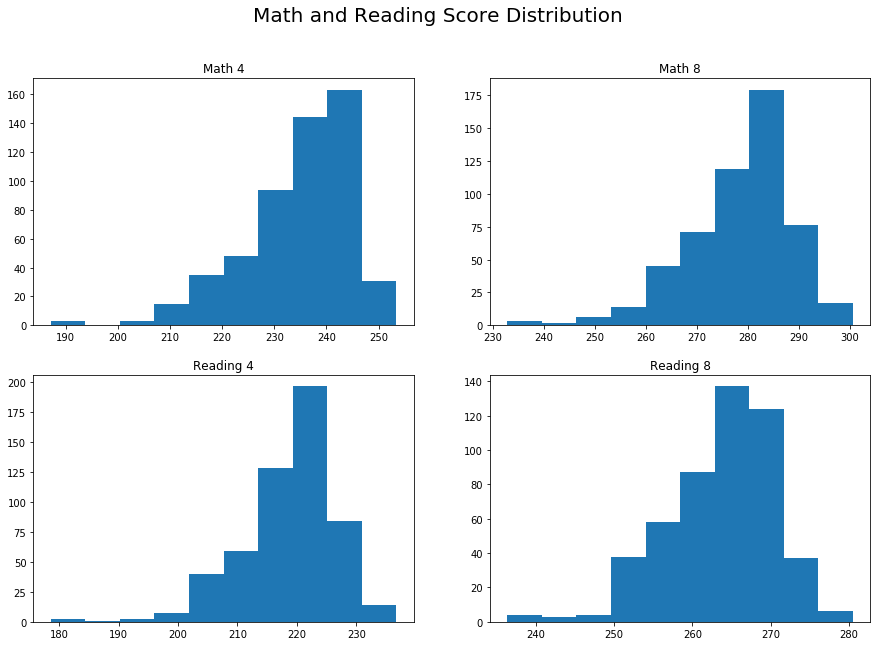

In [81]:
plt.figure(figsize=(15,10))

plt.suptitle('Math and Reading Score Distribution', size = 20)

plt.subplot(2,2,1)
plt.title('Math 4')
plt.hist(used_df_raw.AVG_MATH_4_SCORE)

plt.subplot(2,2,2)
plt.title('Math 8')
plt.hist(used_df_raw.AVG_MATH_8_SCORE)

plt.subplot(2,2,3)
plt.title('Reading 4')
plt.hist(used_df_raw.AVG_READING_4_SCORE)

plt.subplot(2,2,4)
plt.title('Reading 8')
plt.hist(used_df_raw.AVG_READING_8_SCORE)

plt.show()

# Question 5

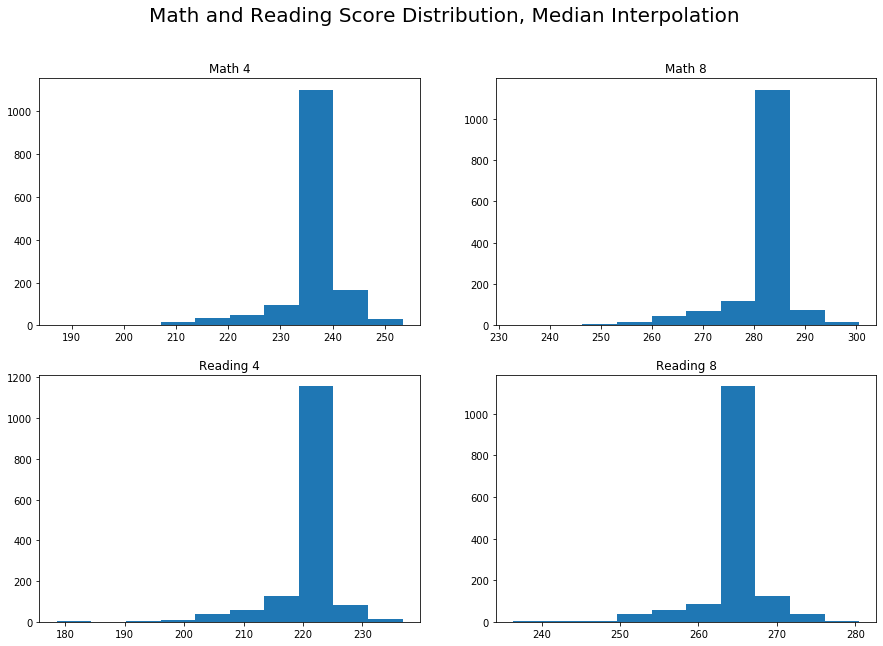

In [82]:
plt.figure(figsize=(15,10))

plt.suptitle('Math and Reading Score Distribution, Median Interpolation', size = 20)

plt.subplot(2,2,1)
plt.title('Math 4')
plt.hist(used_df.AVG_MATH_4_SCORE)

plt.subplot(2,2,2)
plt.title('Math 8')
plt.hist(used_df.AVG_MATH_8_SCORE)

plt.subplot(2,2,3)
plt.title('Reading 4')
plt.hist(used_df.AVG_READING_4_SCORE)

plt.subplot(2,2,4)
plt.title('Reading 8')
plt.hist(used_df.AVG_READING_8_SCORE)

plt.show()

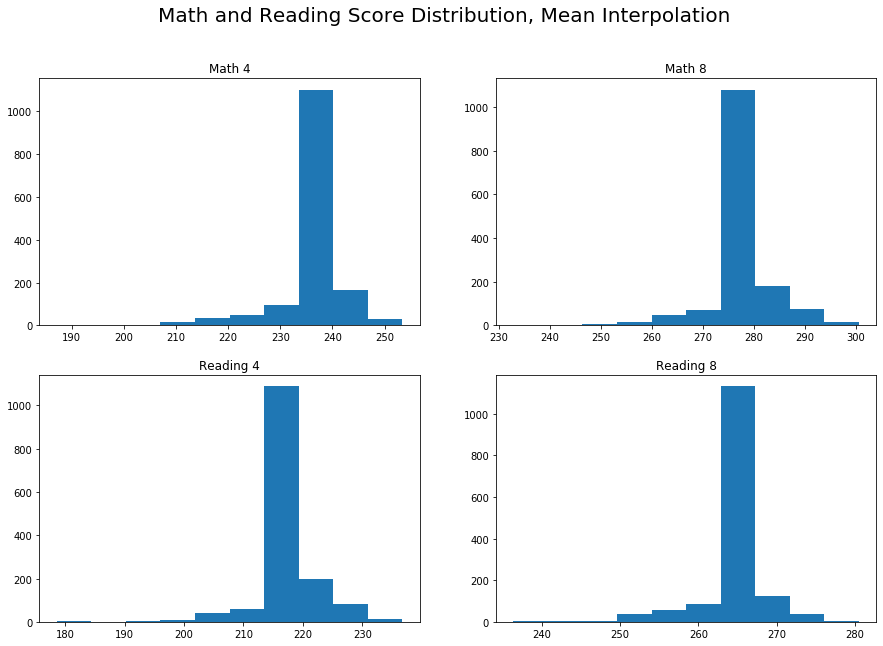

In [83]:
used_df_usingmean = used_df_raw.fillna(used_df_raw.mean())


plt.figure(figsize=(15,10))

plt.suptitle('Math and Reading Score Distribution, Mean Interpolation', size = 20)

plt.subplot(2,2,1)
plt.title('Math 4')
plt.hist(used_df_usingmean.AVG_MATH_4_SCORE)

plt.subplot(2,2,2)
plt.title('Math 8')
plt.hist(used_df_usingmean.AVG_MATH_8_SCORE)

plt.subplot(2,2,3)
plt.title('Reading 4')
plt.hist(used_df_usingmean.AVG_READING_4_SCORE)

plt.subplot(2,2,4)
plt.title('Reading 8')
plt.hist(used_df_usingmean.AVG_READING_8_SCORE)

plt.show()

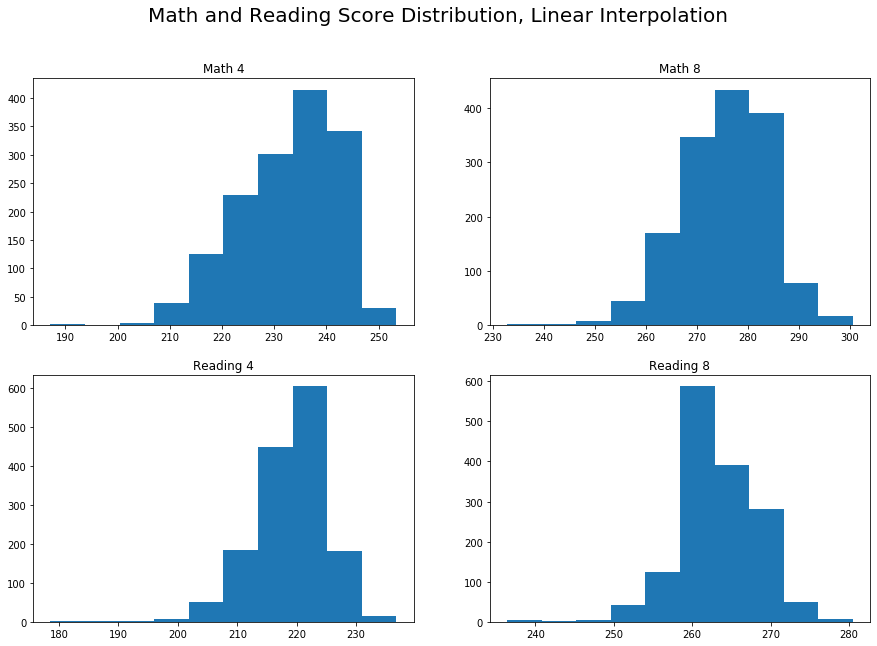

In [84]:
used_df_usinglinear = used_df_raw.interpolate()


plt.figure(figsize=(15,10))

plt.suptitle('Math and Reading Score Distribution, Linear Interpolation', size = 20)

plt.subplot(2,2,1)
plt.title('Math 4')
plt.hist(used_df_usinglinear.AVG_MATH_4_SCORE)

plt.subplot(2,2,2)
plt.title('Math 8')
plt.hist(used_df_usinglinear.AVG_MATH_8_SCORE)

plt.subplot(2,2,3)
plt.title('Reading 4')
plt.hist(used_df_usinglinear.AVG_READING_4_SCORE)

plt.subplot(2,2,4)
plt.title('Reading 8')
plt.hist(used_df_usinglinear.AVG_READING_8_SCORE)

plt.show()

It appears that linear interpolation produces the most normal-looking distributions. To my understanding, this fills in missing values with values using adjacent rows in the data set, which in our case would usually mean the observation from the same year of the states adjacent alphabetically. This seems like a sloppy way to interpolate. Interpolating from observations of the same state in previous and future years seems more sound.

In [85]:
pd.reset_option('display.float_format')